### 0. Imports and Constants

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_MAX = 100
CONST = [0.1, 1, 5]

### 1. Canonical Density Operator

The number operator $\hat{n} = \hat{a}^\dagger\hat{a} = \sum_n n|n\rangle\langle n|$ is

In [3]:
n = np.diag([i for i in range(N_MAX + 1)])
n

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  98,   0,   0],
       [  0,   0,   0, ...,   0,  99,   0],
       [  0,   0,   0, ...,   0,   0, 100]])

In [4]:
def rho_k(c: float) -> np.ndarray:
    exp = np.exp(-n / c)
    Z = np.trace(exp)
    return exp / Z

For different constants $c \equiv \frac{k_\text{B}T}{\hbar\omega}$ we get the following density matrices $\hat{\rho}_\text{K}$ with traces $Sp\{\hat{\rho}_\text{K}\}$ and mean occupation numbers $\langle\hat{n}\rangle$.

$c = 0.1$:

In [5]:
rho = rho_k(CONST[0])
rho, np.trace(rho), np.trace(n @ rho), 1 / (np.exp(1 / CONST[0]) - 1)

(array([[9.99954600e-01, 9.99954600e-01, 9.99954600e-01, ...,
         9.99954600e-01, 9.99954600e-01, 9.99954600e-01],
        [9.99954600e-01, 4.53978686e-05, 9.99954600e-01, ...,
         9.99954600e-01, 9.99954600e-01, 9.99954600e-01],
        [9.99954600e-01, 9.99954600e-01, 2.06106005e-09, ...,
         9.99954600e-01, 9.99954600e-01, 9.99954600e-01],
        ...,
        [9.99954600e-01, 9.99954600e-01, 9.99954600e-01, ...,
         0.00000000e+00, 9.99954600e-01, 9.99954600e-01],
        [9.99954600e-01, 9.99954600e-01, 9.99954600e-01, ...,
         9.99954600e-01, 0.00000000e+00, 9.99954600e-01],
        [9.99954600e-01, 9.99954600e-01, 9.99954600e-01, ...,
         9.99954600e-01, 9.99954600e-01, 0.00000000e+00]]),
 1.0,
 4.540199100968777e-05,
 4.5401991009687765e-05)

$c = 1$:

In [6]:
rho = rho_k(CONST[1])
rho, np.trace(rho), np.trace(n @ rho), 1 / (np.exp(1 / CONST[1]) - 1)

(array([[6.32120559e-01, 6.32120559e-01, 6.32120559e-01, ...,
         6.32120559e-01, 6.32120559e-01, 6.32120559e-01],
        [6.32120559e-01, 2.32544158e-01, 6.32120559e-01, ...,
         6.32120559e-01, 6.32120559e-01, 6.32120559e-01],
        [6.32120559e-01, 6.32120559e-01, 8.55482149e-02, ...,
         6.32120559e-01, 6.32120559e-01, 6.32120559e-01],
        ...,
        [6.32120559e-01, 6.32120559e-01, 6.32120559e-01, ...,
         1.73756352e-43, 6.32120559e-01, 6.32120559e-01],
        [6.32120559e-01, 6.32120559e-01, 6.32120559e-01, ...,
         6.32120559e-01, 6.39213895e-44, 6.32120559e-01],
        [6.32120559e-01, 6.32120559e-01, 6.32120559e-01, ...,
         6.32120559e-01, 6.32120559e-01, 2.35153650e-44]]),
 1.0,
 0.5819767068693265,
 0.5819767068693265)

$c = 5$:

In [7]:
rho = rho_k(CONST[2])
rho, np.trace(rho), np.trace(n @ rho), 1 / (np.exp(1 / CONST[2]) - 1)

(array([[1.81269247e-01, 1.81269247e-01, 1.81269247e-01, ...,
         1.81269247e-01, 1.81269247e-01, 1.81269247e-01],
        [1.81269247e-01, 1.48410707e-01, 1.81269247e-01, ...,
         1.81269247e-01, 1.81269247e-01, 1.81269247e-01],
        [1.81269247e-01, 1.81269247e-01, 1.21508410e-01, ...,
         1.81269247e-01, 1.81269247e-01, 1.81269247e-01],
        ...,
        [1.81269247e-01, 1.81269247e-01, 1.81269247e-01, ...,
         5.57381161e-10, 1.81269247e-01, 1.81269247e-01],
        [1.81269247e-01, 1.81269247e-01, 1.81269247e-01, ...,
         1.81269247e-01, 4.56345098e-10, 1.81269247e-01],
        [1.81269247e-01, 1.81269247e-01, 1.81269247e-01, ...,
         1.81269247e-01, 1.81269247e-01, 3.73623766e-10]]),
 0.9999999999999998,
 4.516655395686478,
 4.516655566126994)

### 2. Coherent Density Operator

In [8]:
def rho_cho(alpha_square: float) -> np.ndarray:
    vec = np.array([np.sqrt(alpha_square**i / math.factorial(i)) for i in range(N_MAX + 1)])
    return np.exp(-alpha_square) * np.outer(vec, vec)

For different constants $|\alpha|^2$ we get the density matrices $\hat{\rho}_\text{cho}$ with traces $Sp\{\hat{\rho}_\text{cho}\}$, purity $R = Sp\{\hat{\rho}_\text{cho}^2\}$ and mean occupation numbers $\langle\hat{n}\rangle$.

$|\alpha|^2 = 0.1$:

In [9]:
rho = rho_cho(CONST[0])
rho, np.trace(rho), np.trace(rho @ rho), np.trace(n @ rho), CONST[0]

(array([[9.04837418e-001, 2.86134715e-001, 6.39816674e-002, ...,
         9.31936500e-127, 2.96188863e-128, 9.36631424e-130],
        [2.86134715e-001, 9.04837418e-002, 2.02327798e-002, ...,
         2.94704198e-127, 9.36631424e-129, 2.96188863e-130],
        [6.39816674e-002, 2.02327798e-002, 4.52418709e-003, ...,
         6.58978619e-128, 2.09437153e-129, 6.62298432e-131],
        ...,
        [9.31936500e-127, 2.94704198e-127, 6.58978619e-128, ...,
         9.59847176e-253, 3.05059458e-254, 9.64682709e-256],
        [2.96188863e-128, 9.36631424e-129, 2.09437153e-129, ...,
         3.05059458e-254, 9.69542603e-256, 3.06596291e-257],
        [9.36631424e-130, 2.96188863e-130, 6.62298432e-131, ...,
         9.64682709e-256, 3.06596291e-257, 9.69542603e-259]]),
 0.9999999999999998,
 0.9999999999999997,
 0.1,
 0.1)

$|\alpha|^2 = 1$:

In [10]:
rho = rho_cho(CONST[1])
rho, np.trace(rho), np.trace(rho @ rho), np.trace(n @ rho), CONST[1]

(array([[3.67879441e-001, 3.67879441e-001, 2.60130048e-001, ...,
         3.78897106e-078, 3.80805920e-079, 3.80805920e-080],
        [3.67879441e-001, 3.67879441e-001, 2.60130048e-001, ...,
         3.78897106e-078, 3.80805920e-079, 3.80805920e-080],
        [2.60130048e-001, 2.60130048e-001, 1.83939721e-001, ...,
         2.67920713e-078, 2.69270448e-079, 2.69270448e-080],
        ...,
        [3.78897106e-078, 3.78897106e-078, 2.67920713e-078, ...,
         3.90244740e-155, 3.92210721e-156, 3.92210721e-157],
        [3.80805920e-079, 3.80805920e-079, 2.69270448e-079, ...,
         3.92210721e-156, 3.94186606e-157, 3.94186606e-158],
        [3.80805920e-080, 3.80805920e-080, 2.69270448e-080, ...,
         3.92210721e-157, 3.94186606e-158, 3.94186606e-159]]),
 1.0,
 1.0000000000000002,
 1.0,
 1)

$|\alpha|^2 = 5$:

In [11]:
rho = rho_cho(CONST[2])
rho, np.trace(rho), np.trace(rho @ rho), np.trace(n @ rho), CONST[2]

(array([[6.73794700e-03, 1.50665075e-02, 2.38222401e-02, ...,
         1.23274592e-45, 2.77039043e-46, 6.19478132e-47],
        [1.50665075e-02, 3.36897350e-02, 5.32681482e-02, ...,
         2.75650367e-45, 6.19478132e-46, 1.38519521e-46],
        [2.38222401e-02, 5.32681482e-02, 8.42243375e-02, ...,
         4.35841499e-45, 9.79480929e-46, 2.19018594e-46],
        ...,
        [1.23274592e-45, 2.75650367e-45, 4.35841499e-45, ...,
         2.25537912e-88, 5.06858764e-89, 1.13337065e-89],
        [2.77039043e-46, 6.19478132e-46, 9.79480929e-46, ...,
         5.06858764e-89, 1.13908036e-89, 2.54706112e-90],
        [6.19478132e-47, 1.38519521e-46, 2.19018594e-46, ...,
         1.13337065e-89, 2.54706112e-90, 5.69540182e-91]]),
 1.0,
 1.0,
 5.0,
 5)

### 3. Occupation probabilities

From the relation between the mean occupation number and the constants we get 
$$c = \frac{k_\text{B}T}{\hbar\omega} = \frac{1}{\ln\left(\frac{1}{\langle\hat{n}\rangle} + 1\right)} = \frac{1}{\ln\left(\frac{4}{3}\right)}$$
and $$|\alpha|^2 = \langle\hat{n}\rangle = 3\,.$$

In [12]:
rhoK = rho_k(1 / np.log(4 / 3))
rhoC = rho_cho(3)
rhoK, rhoC, np.trace(n @ rhoK), np.trace(n @ rhoC)

(array([[2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
         2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 1.87500000e-01, 2.50000000e-01, ...,
         2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 1.40625000e-01, ...,
         2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
        ...,
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
         1.42542319e-13, 2.50000000e-01, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
         2.50000000e-01, 1.06906740e-13, 2.50000000e-01],
        [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
         2.50000000e-01, 2.50000000e-01, 8.01800546e-14]]),
 array([[4.97870684e-002, 8.62337320e-002, 1.05614321e-001, ...,
         1.22708262e-055, 2.13607666e-056, 3.69979331e-057],
        [8.62337320e-002, 1.49361205e-001, 1.82929370e-001, ...,
         2.12536945e-055, 3.69979331e-056, 6.40822999e-057],
        [1.05

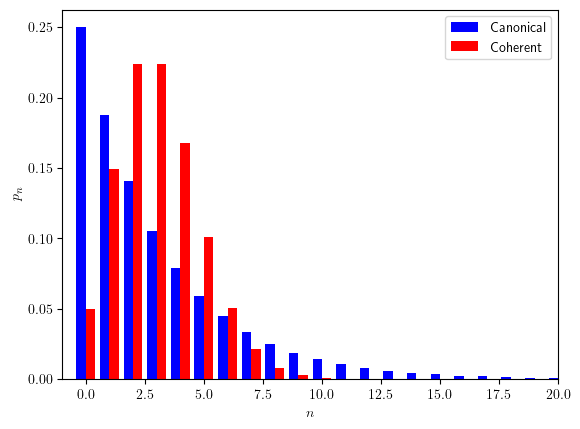

In [13]:
plt.bar(np.arange(N_MAX + 1) - 0.2, np.diag(rhoK), width=0.4, label="Canonical", color='blue')
plt.bar(np.arange(N_MAX + 1) + 0.2, np.diag(rhoC), width=0.4, label="Coherent", color='red')
plt.xlim(-1, 20)
plt.xlabel("$n$")
plt.ylabel("$p_n$")
plt.legend()
plt.show()

### 4. Free Energy

The free energy is $F = \langle\hat{H}\rangle - TS$. It follows that 
$$\beta F = \frac{\langle\hat{n}\rangle}{c} + \langle\ln\hat{\rho}\rangle = 3\ln\left(\frac{4}{3}\right) + \langle\ln\hat{\rho}\rangle \,.$$

In [14]:
F_K = 3 * np.log(4 / 3) + np.trace(rhoK @ np.log(rhoK))
F_C = 3 * np.log(4 / 3) + np.trace(rhoC @ np.log(rhoC))
F_K, F_C

(-3501.779556189067, -18.368301518676958)

We see that $F_\text{K} < F_\text{cho}$.